[View in Colaboratory](https://colab.research.google.com/github/MariamMohamedFawzy/Deep-Learning-Notebooks/blob/master/Moving_MNIST.ipynb)

# Data

In [1]:
!wget http://www.cs.toronto.edu/~nitish/unsupervised_video/mnist_test_seq.npy

--2018-08-24 10:17:42--  http://www.cs.toronto.edu/~nitish/unsupervised_video/mnist_test_seq.npy
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 819200096 (781M)
Saving to: ‘mnist_test_seq.npy’

mnist_test_seq.npy  100%[===================>] 781.25M  1.91MB/s    in 5m 20s  

2018-08-24 10:23:02 (2.44 MB/s) - ‘mnist_test_seq.npy’ saved [819200096/819200096]



In [2]:
!ls

datalab  mnist_test_seq.npy  sample_data


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
f = np.load('mnist_test_seq.npy')

In [4]:
f.shape

(20, 10000, 64, 64)

In [0]:
f0 = f[0, 0, :, :]
f20 = f[19, 0, :, :]

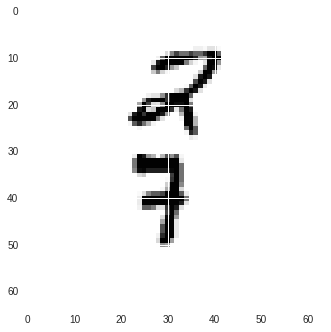

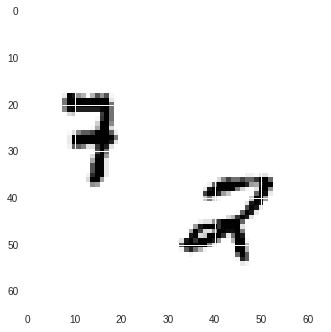

In [6]:
plt.imshow(f0)
plt.show()
plt.imshow(f20)
plt.show()

In [7]:
np.min(f), np.max(f)

(0, 255)

In [0]:
# f = f / 255.0

In [0]:
x_train = f[:, :7000, :, :]
x_test = f[:, 7000:, :, :]

In [0]:
x_train = np.swapaxes(x_train, 0, 1)
x_test = np.swapaxes(x_test, 0, 1)

In [26]:
x_train.shape, x_test.shape

((7000, 20, 64, 64), (3000, 20, 64, 64))

In [0]:
x_train2 = np.zeros((x_train.shape[0], 20, 32, 32))
for i in range(x_train.shape[0]):
  frames = x_train[i, :, :, :]
  x_train2[i] = list(map(lambda t: cv2.resize(t, (32, 32)), frames))

In [0]:
x_test2 = np.zeros((x_test.shape[0], 20, 32, 32))
for i in range(x_test.shape[0]):
  frames = x_test[i, :, :, :]
  x_test2[i] = list(map(lambda t: cv2.resize(t, (32, 32)), frames))

In [12]:
x_train2.shape, x_test2.shape

((7000, 20, 32, 32), (3000, 20, 32, 32))

In [0]:
x_train = x_train2
x_test = x_test2
del x_train2
del x_test2

In [0]:
x_train = x_train / 255
x_test = x_test / 255

In [0]:
#without cnn
x_train = x_train.reshape((x_train.shape[0], 20, 32*32))
x_test = x_test.reshape((x_test.shape[0], 20, 32*32))

In [0]:
#without cnn
x_train_split1 = x_train[:, :10, :]
x_train_split2 = x_train[:, 10:, :]

x_test_split1 = x_test[:, :10, :]
x_test_split2 = x_test[:, 10:, :]

In [49]:
x_train.shape, x_test.shape

((7000, 20, 32, 32), (3000, 20, 32, 32))

In [0]:
# with cnn

x_train = x_train.reshape((x_train.shape[0], 20, 32, 32, 1))
x_test = x_test.reshape((x_test.shape[0], 20, 32, 32, 1))

x_train_split1 = x_train[:, :10, :, :, :]
x_train_split2 = x_train[:, 10:, :, :, :]

x_test_split1 = x_test[:, :10, :, :, :]
x_test_split2 = x_test[:, 10:, :, :, :]

In [0]:
x_train_split2 = x_train_split2.reshape((x_train_split2.shape[0], 10, 32*32))
x_test_split2 = x_test_split2.reshape((x_test_split2.shape[0], 10, 32*32))

In [0]:
x_train_dec = np.zeros((x_train.shape[0], 10 , 32*32))
x_test_dec = np.zeros((x_test.shape[0], 10 , 32*32))

In [0]:
#composite
x_train_dec2 = np.zeros((x_train.shape[0], 10 , 32*32))
x_test_dec2 = np.zeros((x_test.shape[0], 10 , 32*32))

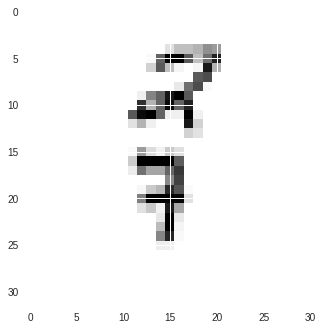

In [19]:
plt.imshow(x_train[0][0].reshape((32, 32)))

In [14]:
import keras
from keras.models import Sequential, Model, Input
from keras.layers import Conv2D, LSTM, MaxPool2D, Dense, Dropout, Activation, UpSampling2D, Flatten, TimeDistributed, Reshape
from keras.optimizers import SGD, Adam, RMSprop
from keras import losses

Using TensorFlow backend.


**Unconditional decoder**

# One layer

In [138]:
#encoder

# num_cells = 4096

num_input = 32 * 32

num_cells = 32 * 32

in_encoder = Input(shape=(10, num_input))

encoder_lstm = LSTM(num_cells, return_state=True)

out_encoder, h_encoder, c_encoder = encoder_lstm(in_encoder)

encoder_states = [h_encoder, c_encoder]

print(h_encoder.shape, c_encoder.shape)


#decoder

in_decoder = Input(shape=(10,num_cells))

decoder_lstm = LSTM(num_input, return_sequences=True, return_state=True, activation='sigmoid')

out_decoder, _, _ = decoder_lstm(in_decoder, initial_state=encoder_states)


model = Model([in_encoder, in_decoder], [out_decoder])



(?, 1024) (?, 1024)


In [84]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 10, 1024)     0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           (None, 10, 1024)     0                                            
__________________________________________________________________________________________________
lstm_17 (LSTM)                  [(None, 1024), (None 8392704     input_17[0][0]                   
__________________________________________________________________________________________________
lstm_18 (LSTM)                  [(None, 10, 1024), ( 8392704     input_18[0][0]                   
                                                                 lstm_17[0][1]                    
          

In [0]:
# op = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
op = keras.optimizers.Adam(lr=0.001)

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.0001)

model.compile(optimizer=op,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [141]:
model.fit([x_train_split1, x_train_dec], [x_train_split2], epochs=100, batch_size=16, callbacks=[reduce_lr])

Epoch 1/100
7000/7000 [==============================] - 58s 8ms/step - loss: 0.1754 - acc: 0.9068
Epoch 2/100
7000/7000 [==============================] - 52s 7ms/step - loss: 0.1576 - acc: 0.9067
Epoch 3/100
7000/7000 [==============================] - 52s 7ms/step - loss: 0.1526 - acc: 0.9067
Epoch 4/100
7000/7000 [==============================] - 52s 7ms/step - loss: 0.1524 - acc: 0.9067
Epoch 5/100
7000/7000 [==============================] - 52s 7ms/step - loss: 0.1477 - acc: 0.9066
Epoch 6/100
7000/7000 [==============================] - 52s 7ms/step - loss: 0.1450 - acc: 0.9066
Epoch 7/100
7000/7000 [==============================] - 52s 7ms/step - loss: 0.1436 - acc: 0.9066
Epoch 8/100
7000/7000 [==============================] - 52s 7ms/step - loss: 0.1467 - acc: 0.9066
Epoch 9/100
7000/7000 [==============================] - 52s 7ms/step - loss: 0.1441 - acc: 0.9066
Epoch 10/100
7000/7000 [==============================] - 52s 7ms/step - loss: 0.1569 - acc: 0.9066
Epoch 11/

In [0]:
frames_pred = model.predict([x_test_split1, x_test_dec])

In [0]:
frames_pred = frames_pred.reshape(3000, 10, 32, 32)

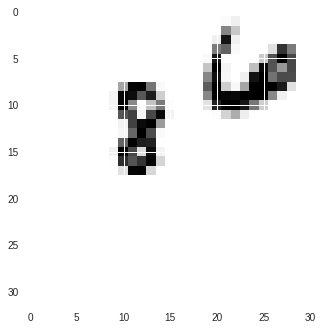

In [144]:
plt.imshow(x_test_split2.reshape(3000, 10, 32, 32)[0, 0, :, :])

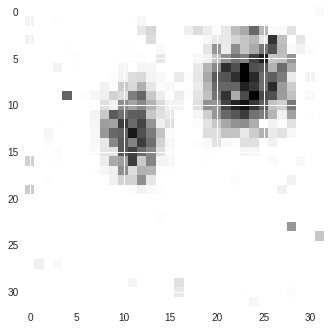

In [145]:
plt.imshow(frames_pred[0, 0, :, :])

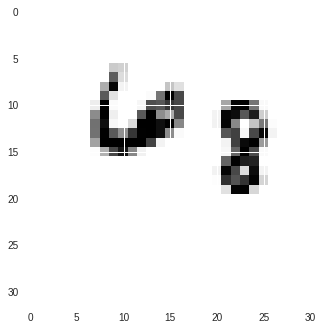

In [146]:
plt.imshow(x_test_split2.reshape(3000, 10, 32, 32)[0, 9, :, :])

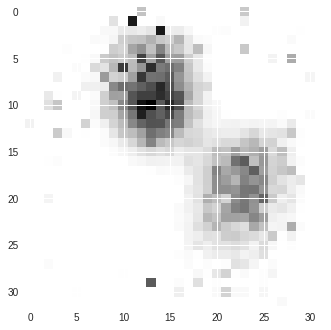

In [148]:
plt.imshow(frames_pred[0, 9, :, :])

In [149]:
np.min(x_test_split2.reshape(3000, 10, 32, 32)[0, 9, :, :]), np.max(x_test_split2.reshape(3000, 10, 32, 32)[0, 9, :, :])

(0.0, 0.9921568627450981)

In [150]:
np.min(frames_pred[0, 9, :, :]), np.max(frames_pred[0, 9, :, :])

(0.0, 0.45250553)

In [151]:
model.save('model1.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py:2379: UserWarning: Layer lstm_32 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_31/while/Exit_2:0' shape=(?, 1024) dtype=float32>, <tf.Tensor 'lstm_31/while/Exit_3:0' shape=(?, 1024) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


# Two layers

In [66]:
x_train_split1.shape, x_train_dec.shape, x_train_split2.shape

((7000, 10, 1024), (7000, 10, 1024), (7000, 10, 1024))

In [86]:
#encoder

# num_cells = 4096

num_input = 32 * 32

num_cells = 32 * 32

in_encoder = Input(shape=(10, num_input))

encoder_lstm = LSTM(num_cells, return_sequences=True, name='lstm1')

out_encoder1 = encoder_lstm(in_encoder)

print(out_encoder1)

encoder_lstm2 = LSTM(num_input, return_sequences=True, return_state=True, name='lstm2')

out_encoder, h_encoder, c_encoder = encoder_lstm2(out_encoder1)

encoder_states = [h_encoder, c_encoder]

print(h_encoder.shape, c_encoder.shape)


#decoder

in_decoder = Input(shape=(10,num_input))

decoder_lstm = LSTM(num_input, return_sequences=True, name='lstm3')

out_decoder1 = decoder_lstm(in_decoder, initial_state=encoder_states)

decoder_lstm2 = LSTM(num_input, return_sequences=True, name='lstm4', activation='sigmoid')

out_decoder = decoder_lstm2(out_decoder1)

print(out_decoder)

model = Model([in_encoder, in_decoder], [out_decoder])



Tensor("lstm1_11/transpose_1:0", shape=(?, ?, 1024), dtype=float32)
(?, 1024) (?, 1024)
Tensor("lstm4_6/transpose_1:0", shape=(?, ?, 1024), dtype=float32)


In [87]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           (None, 10, 1024)     0                                            
__________________________________________________________________________________________________
lstm1 (LSTM)                    (None, 10, 1024)     8392704     input_22[0][0]                   
__________________________________________________________________________________________________
input_23 (InputLayer)           (None, 10, 1024)     0                                            
__________________________________________________________________________________________________
lstm2 (LSTM)                    [(None, 10, 1024), ( 8392704     lstm1[0][0]                      
__________________________________________________________________________________________________
lstm3 (LST

In [0]:
# op = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
op = keras.optimizers.Adam(lr=0.01)

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.0001)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [89]:
model.fit([x_train_split1, x_train_dec], [x_train_split2], epochs=100, batch_size=16, callbacks=[reduce_lr])

Epoch 1/100
7000/7000 [==============================] - 107s 15ms/step - loss: 0.2132 - acc: 0.9068
Epoch 2/100
7000/7000 [==============================] - 101s 14ms/step - loss: 0.1949 - acc: 0.9068
Epoch 3/100
7000/7000 [==============================] - 100s 14ms/step - loss: 0.1975 - acc: 0.9068
Epoch 4/100
7000/7000 [==============================] - 100s 14ms/step - loss: 0.1930 - acc: 0.9068
Epoch 5/100
7000/7000 [==============================] - 101s 14ms/step - loss: 0.1898 - acc: 0.9067
Epoch 6/100
7000/7000 [==============================] - 100s 14ms/step - loss: 0.1797 - acc: 0.9068
Epoch 7/100
7000/7000 [==============================] - 101s 14ms/step - loss: 0.1784 - acc: 0.9068
Epoch 8/100
7000/7000 [==============================] - 101s 14ms/step - loss: 0.1776 - acc: 0.9068
Epoch 9/100
7000/7000 [==============================] - 100s 14ms/step - loss: 0.1772 - acc: 0.9068
Epoch 10/100
7000/7000 [==============================] - 100s 14ms/step - loss: 0.1888 - a

In [0]:
frames_pred = model.predict([x_test_split1, x_test_dec])

In [0]:
frames_pred = frames_pred.reshape(3000, 10, 32, 32)

In [92]:
np.min(frames_pred), np.max(frames_pred)

(0.0, 0.96190315)

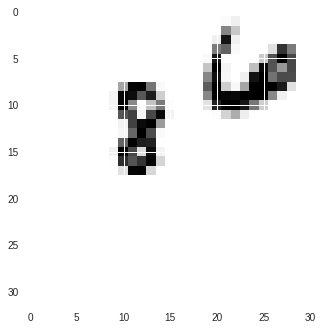

In [93]:
plt.imshow(x_test_split2.reshape(3000, 10, 32, 32)[0, 0, :, :])

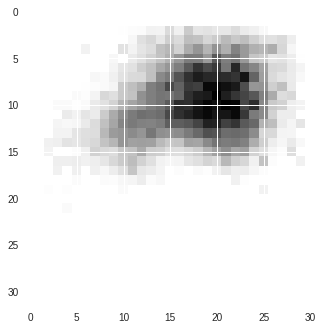

In [94]:
plt.imshow(frames_pred[0, 0, :, :])

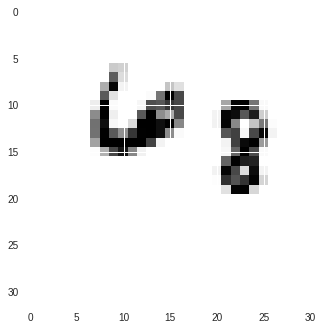

In [96]:
plt.imshow(x_test_split2.reshape(3000, 10, 32, 32)[0, 9, :, :])

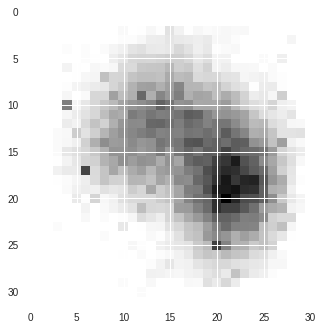

In [97]:
plt.imshow(frames_pred[0, 9, :, :])

# composite one layer

In [99]:
#encoder

# num_cells = 4096

num_input = 32 * 32

num_cells = 32 * 32

in_encoder = Input(shape=(10, num_input))

encoder_lstm = LSTM(num_cells, return_state=True)

out_encoder, h_encoder, c_encoder = encoder_lstm(in_encoder)

encoder_states = [h_encoder, c_encoder]

print(h_encoder.shape, c_encoder.shape)


#decoder

#predictor
in_decoder = Input(shape=(10,num_cells))

decoder_lstm = LSTM(num_input, return_sequences=True, return_state=True, activation='sigmoid')

out_decoder, _, _ = decoder_lstm(in_decoder, initial_state=encoder_states)

#reconstruction
in_decoder2 = Input(shape=(10,num_cells))

decoder_lstm2 = LSTM(num_input, return_sequences=True, return_state=True, activation='sigmoid')

out_decoder2, _, _ = decoder_lstm2(in_decoder2, initial_state=encoder_states)


model = Model([in_encoder, in_decoder, in_decoder2], [out_decoder, out_decoder2])



(?, 1024) (?, 1024)


In [101]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 10, 1024)     0                                            
__________________________________________________________________________________________________
input_25 (InputLayer)           (None, 10, 1024)     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 1024), (None 8392704     input_24[0][0]                   
__________________________________________________________________________________________________
input_26 (InputLayer)           (None, 10, 1024)     0                                            
__________________________________________________________________________________________________
lstm_2 (LS

In [0]:
# op = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
op = keras.optimizers.Adam(lr=0.001)

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.0001)

model.compile(optimizer=op,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [102]:
model.fit([x_train_split1, x_train_dec, x_train_dec2], [x_train_split2, x_train_split1], epochs=100, batch_size=16, callbacks=[reduce_lr])

Epoch 1/100
7000/7000 [==============================] - 79s 11ms/step - loss: 0.3152 - lstm_2_loss: 0.1669 - lstm_3_loss: 0.1483 - lstm_2_acc: 0.9067 - lstm_3_acc: 0.9065
Epoch 2/100
7000/7000 [==============================] - 74s 11ms/step - loss: 0.2796 - lstm_2_loss: 0.1524 - lstm_3_loss: 0.1271 - lstm_2_acc: 0.9067 - lstm_3_acc: 0.9062
Epoch 3/100
7000/7000 [==============================] - 74s 11ms/step - loss: 0.2720 - lstm_2_loss: 0.1499 - lstm_3_loss: 0.1221 - lstm_2_acc: 0.9067 - lstm_3_acc: 0.9060
Epoch 4/100
7000/7000 [==============================] - 73s 10ms/step - loss: 0.2692 - lstm_2_loss: 0.1475 - lstm_3_loss: 0.1217 - lstm_2_acc: 0.9066 - lstm_3_acc: 0.9059
Epoch 5/100
7000/7000 [==============================] - 74s 11ms/step - loss: 0.2656 - lstm_2_loss: 0.1446 - lstm_3_loss: 0.1210 - lstm_2_acc: 0.9066 - lstm_3_acc: 0.9060
Epoch 6/100
7000/7000 [==============================] - 73s 10ms/step - loss: 0.2732 - lstm_2_loss: 0.1477 - lstm_3_loss: 0.1255 - lstm_2_a

In [0]:
frames_pred = model.predict([x_test_split1, x_test_dec, x_test_dec2])

In [106]:
len(frames_pred)

2

In [0]:
frames_pred_future = frames_pred[0]
frames_pred_reconstruction = frames_pred[1]

In [0]:
frames_pred_future = frames_pred_future.reshape(3000, 10, 32, 32)
frames_pred_reconstruction = frames_pred_reconstruction.reshape(3000, 10, 32, 32)

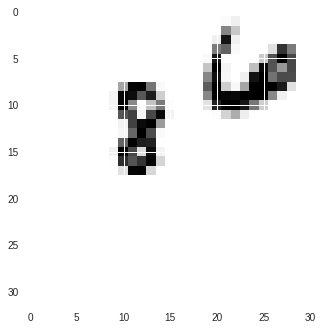

In [109]:
plt.imshow(x_test_split2.reshape(3000, 10, 32, 32)[0, 0, :, :])

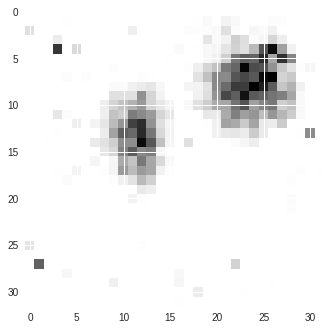

In [110]:
plt.imshow(frames_pred_future[0, 0, :, :])

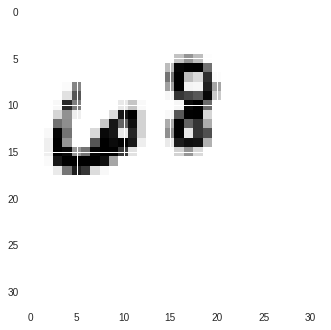

In [112]:
plt.imshow(x_test_split1.reshape(3000, 10, 32, 32)[0, 0, :, :])

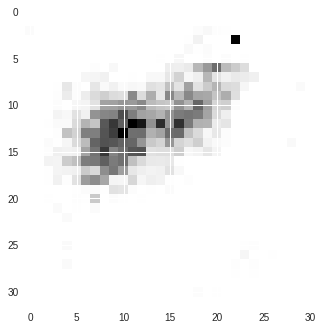

In [113]:
plt.imshow(frames_pred_reconstruction[0, 0, :, :])

# CNN then LSTM

In [19]:
#encoder

# num_cells = 4096

num_input = 32 * 32

num_cells = 32 * 32

in_encoder = Input(shape=(10, 32, 32, 1))

conv1 = TimeDistributed(Conv2D(32, (3, 3)))(in_encoder)

conv2 = TimeDistributed(Conv2D(64, (3, 3)))(conv1)

print(conv2)

flat1 = TimeDistributed(Flatten())(conv2)

print(flat1)

encoder_lstm = LSTM(num_cells, return_state=True)

out_encoder, h_encoder, c_encoder = encoder_lstm(flat1)

encoder_states = [h_encoder, c_encoder]

print(h_encoder.shape, c_encoder.shape)


# #decoder

# #predictor
in_decoder = Input(shape=(10,num_cells))

decoder_lstm = LSTM(num_input, return_sequences=True, return_state=True, activation='sigmoid')

out_decoder, _, _ = decoder_lstm(in_decoder, initial_state=encoder_states)

print(out_decoder)

# resh = TimeDistributed(Reshape((32, 32)))(out_decoder)

model = Model([in_encoder, in_decoder], [out_decoder])



Tensor("time_distributed_2/Reshape_1:0", shape=(?, 10, 28, 28, 64), dtype=float32)
Tensor("time_distributed_3/Reshape_2:0", shape=(?, 10, 50176), dtype=float32)
(?, 1024) (?, 1024)
Tensor("lstm_2/transpose_1:0", shape=(?, ?, 1024), dtype=float32)


In [20]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, 32, 32, 1 0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 10, 30, 30, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 10, 28, 28, 6 18496       time_distributed_1[0][0]         
__________________________________________________________________________________________________
time_distributed_3 (TimeDistrib (None, 10, 50176)    0           time_distributed_2[0][0]         
__________________________________________________________________________________________________
input_2 (I

In [0]:
# op = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
op = keras.optimizers.Adam(lr=0.001)

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.0001)

model.compile(optimizer=op,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit([x_train_split1, x_train_dec], [x_train_split2], epochs=100, batch_size=16, callbacks=[reduce_lr])

Epoch 1/100
7000/7000 [==============================] - 545s 78ms/step - loss: 0.1625 - acc: 0.9067
Epoch 2/100
7000/7000 [==============================] - 528s 75ms/step - loss: 0.1496 - acc: 0.9065
Epoch 3/100
7000/7000 [==============================] - 528s 75ms/step - loss: 0.1475 - acc: 0.9065
Epoch 4/100
7000/7000 [==============================] - 527s 75ms/step - loss: 0.1451 - acc: 0.9065
Epoch 5/100
7000/7000 [==============================] - 528s 75ms/step - loss: 0.1449 - acc: 0.9064
Epoch 6/100
2112/7000 [========>.....................] - ETA: 6:08 - loss: 0.1423 - acc: 0.9069

KeyboardInterrupt: ignored

**too slow**

In [0]:
frames_pred = model.predict([x_test_split1, x_test_dec])

In [24]:
frames_pred.shape

(3000, 10, 1024)

In [0]:
frames_pred = frames_pred.reshape(3000, 10, 32, 32)

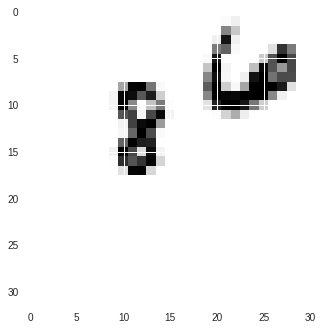

In [25]:
plt.imshow(x_test_split2.reshape(3000, 10, 32, 32)[0, 0, :, :])

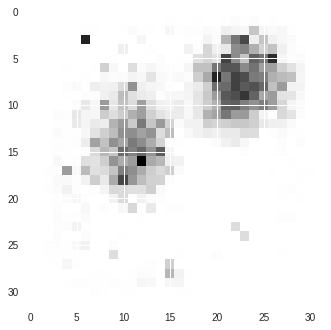

In [29]:
plt.imshow(frames_pred[0, 0, :, :])

# separate autoencoder

In [0]:
#https://blog.keras.io/building-autoencoders-in-keras.html
  
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(32, 32, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [16]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [17]:
x_train.shape, x_test.shape

((7000, 20, 32, 32, 1), (3000, 20, 32, 32, 1))

In [0]:
x_train2 = x_train.reshape((-1, 32, 32, 1))

In [0]:
x_test2 = x_test.reshape((-1, 32, 32, 1))

In [20]:
autoencoder.fit(x_train2, x_train2,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test2, x_test2))

Train on 140000 samples, validate on 60000 samples
Epoch 1/50
140000/140000 [==============================] - 31s 224us/step - loss: 0.1011 - val_loss: 0.0868
Epoch 2/50
140000/140000 [==============================] - 31s 224us/step - loss: 0.0842 - val_loss: 0.0825
Epoch 3/50
140000/140000 [==============================] - 28s 201us/step - loss: 0.0806 - val_loss: 0.0791
Epoch 4/50
140000/140000 [==============================] - 28s 200us/step - loss: 0.0783 - val_loss: 0.0770
Epoch 5/50
140000/140000 [==============================] - 28s 201us/step - loss: 0.0767 - val_loss: 0.0762
Epoch 6/50
140000/140000 [==============================] - 27s 193us/step - loss: 0.0754 - val_loss: 0.0740
Epoch 7/50
140000/140000 [==============================] - 27s 194us/step - loss: 0.0742 - val_loss: 0.0733
Epoch 8/50
140000/140000 [==============================] - 28s 202us/step - loss: 0.0732 - val_loss: 0.0725
Epoch 9/50
140000/140000 [==============================] - 28s 201us/step - 

In [0]:
x_test_pred = autoencoder.predict(x_test2)

In [22]:
x_test_pred.shape

(60000, 32, 32, 1)

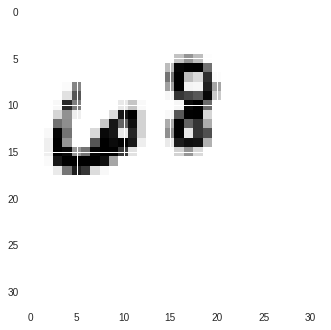

In [23]:
plt.imshow(x_test2[0, :, :, 0])

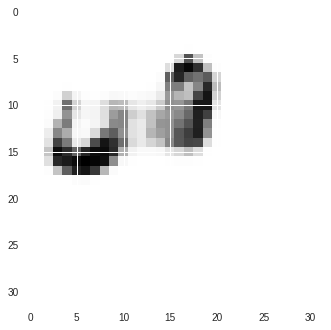

In [24]:
plt.imshow(x_test_pred[0, :, :, 0])

In [0]:
layer_name = 'max_pooling2d_3'
intermediate_layer_model = Model(inputs=autoencoder.input,
                                 outputs=autoencoder.get_layer(layer_name).output)

In [0]:
x_train3 = intermediate_layer_model.predict(x_train2)

In [68]:
x_train3.shape

(140000, 4, 4, 8)

In [0]:
layer_dict = dict([(layer.name, layer) for layer in autoencoder.layers])

In [0]:
input_decoder = Input(shape=(4, 4, 8))
x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_decoder)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(input_decoder, decoded)
decoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [47]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 16)          1168      
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 32, 32, 32)        0         
__________

In [0]:
layer_dict_decoder = dict([(layer.name, layer) for layer in decoder.layers])

In [63]:
layer_decoder_list = list(layer_dict_decoder.keys())[1:]
layer_decoder_list

['conv2d_8',
 'up_sampling2d_4',
 'conv2d_9',
 'up_sampling2d_5',
 'conv2d_10',
 'up_sampling2d_6',
 'conv2d_11']

In [64]:
layer_autoencoder_list = list(layer_dict.keys())[7:]
layer_autoencoder_list

['conv2d_4',
 'up_sampling2d_1',
 'conv2d_5',
 'up_sampling2d_2',
 'conv2d_6',
 'up_sampling2d_3',
 'conv2d_7']

In [0]:
for i in range(len(layer_autoencoder_list)):
  decoder.get_layer(layer_decoder_list[i]).set_weights(autoencoder.get_layer(layer_autoencoder_list[i]).get_weights())

In [0]:
x_train4 = decoder.predict(x_train3)

In [70]:
x_train4.shape

(140000, 32, 32, 1)

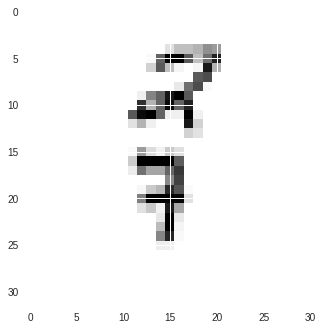

In [73]:
plt.imshow(x_train2[0, :, :, 0])

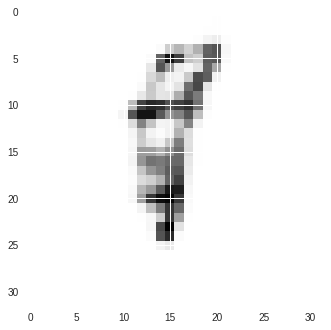

In [72]:
plt.imshow(x_train4[0, :, :, 0])

**weights are transferred successfully**

In [0]:
x_train_split1_enc = intermediate_layer_model.predict(x_train_split1.reshape((-1, 32, 32, 1)))
x_train_split2_enc = intermediate_layer_model.predict(x_train_split2.reshape((-1, 32, 32, 1)))

x_test_split1_enc = intermediate_layer_model.predict(x_test_split1.reshape((-1, 32, 32, 1)))
x_test_split2_enc = intermediate_layer_model.predict(x_test_split2.reshape((-1, 32, 32, 1)))

In [124]:
x_train_split1.shape

(7000, 10, 32, 32, 1)

In [93]:
x_train_split1_enc.shape

(70000, 4, 4, 8)

In [0]:
x_train_split1_enc = x_train_split1_enc.reshape((-1, 10, 128))
x_train_split2_enc = x_train_split2_enc.reshape((-1, 10, 128))
x_test_split1_enc = x_test_split1_enc.reshape((-1, 10, 128))
x_test_split2_enc = x_test_split2_enc.reshape((-1, 10, 128))

In [95]:
x_train_split1_enc.shape, x_train_split2_enc.shape

((7000, 10, 128), (7000, 10, 128))

In [0]:
x_train_dec = np.zeros((x_train.shape[0], 10 , 128))
x_test_dec = np.zeros((x_test.shape[0], 10 , 128))


x_train_dec2 = np.zeros((x_train.shape[0], 10 , 128))
x_test_dec2 = np.zeros((x_test.shape[0], 10 , 128))

In [107]:
#encoder

# num_cells = 4096

num_input = 128

num_cells = 128

in_encoder = Input(shape=(10, num_input))

encoder_lstm = LSTM(num_cells, return_state=True)

out_encoder, h_encoder, c_encoder = encoder_lstm(in_encoder)

encoder_states = [h_encoder, c_encoder]

print(h_encoder.shape, c_encoder.shape)


#decoder

#predictor
in_decoder = Input(shape=(10,num_cells))

decoder_lstm = LSTM(num_input, return_sequences=True, return_state=True, activation='sigmoid')

out_decoder, _, _ = decoder_lstm(in_decoder, initial_state=encoder_states)

#reconstruction
in_decoder2 = Input(shape=(10,num_cells))

decoder_lstm2 = LSTM(num_input, return_sequences=True, return_state=True, activation='sigmoid')

out_decoder2, _, _ = decoder_lstm2(in_decoder2, initial_state=encoder_states)


model = Model([in_encoder, in_decoder, in_decoder2], [out_decoder, out_decoder2])



(?, 128) (?, 128)


In [98]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 10, 128)      0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 10, 128)      0                                            
__________________________________________________________________________________________________
lstm_7 (LSTM)                   [(None, 128), (None, 131584      input_14[0][0]                   
__________________________________________________________________________________________________
input_16 (InputLayer)           (None, 10, 128)      0                                            
__________________________________________________________________________________________________
lstm_8 (LS

In [0]:
# op = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
# op = keras.optimizers.Adam(lr=0.001)

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.0001)

model.compile(optimizer='adagrad',
              loss='mse')

In [109]:
model.fit([x_train_split1_enc, x_train_dec, x_train_dec2], [x_train_split2_enc, x_train_split1_enc], epochs=100, batch_size=16, callbacks=[reduce_lr])

Epoch 1/100
7000/7000 [==============================] - 39s 6ms/step - loss: 0.9104 - lstm_17_loss: 0.4964 - lstm_18_loss: 0.4139
Epoch 2/100
7000/7000 [==============================] - 36s 5ms/step - loss: 0.8606 - lstm_17_loss: 0.4667 - lstm_18_loss: 0.3939
Epoch 3/100
7000/7000 [==============================] - 36s 5ms/step - loss: 0.8342 - lstm_17_loss: 0.4452 - lstm_18_loss: 0.3890
Epoch 4/100
7000/7000 [==============================] - 36s 5ms/step - loss: 0.8168 - lstm_17_loss: 0.4325 - lstm_18_loss: 0.3843
Epoch 5/100
7000/7000 [==============================] - 36s 5ms/step - loss: 0.8044 - lstm_17_loss: 0.4251 - lstm_18_loss: 0.3793
Epoch 6/100
7000/7000 [==============================] - 36s 5ms/step - loss: 0.7953 - lstm_17_loss: 0.4202 - lstm_18_loss: 0.3751
Epoch 7/100
7000/7000 [==============================] - 36s 5ms/step - loss: 0.7886 - lstm_17_loss: 0.4168 - lstm_18_loss: 0.3718
Epoch 8/100
7000/7000 [==============================] - 36s 5ms/step - loss: 0.783

In [0]:
frames_pred = model.predict([x_test_split1_enc, x_test_dec, x_test_dec2])

In [0]:
frames_pred_future_enc = frames_pred[0]
frames_pred_reconstruction_enc = frames_pred[1]

In [115]:
frames_pred_future_enc.shape, frames_pred_reconstruction_enc.shape

((3000, 10, 128), (3000, 10, 128))

In [0]:
frames_pred_future_enc = frames_pred_future_enc.reshape((-1, 4, 4, 8))
frames_pred_reconstruction_enc = frames_pred_reconstruction_enc.reshape((-1, 4, 4, 8))

In [0]:
frames_pred_future = decoder.predict(frames_pred_future_enc)
frames_pred_reconstruction = decoder.predict(frames_pred_future_enc)

In [119]:
frames_pred_future.shape, frames_pred_reconstruction.shape

((30000, 32, 32, 1), (30000, 32, 32, 1))

In [0]:
frames_pred_future = frames_pred_future.reshape((-1, 10, 32, 32))
frames_pred_reconstruction = frames_pred_reconstruction.reshape((-1, 10, 32, 32))

In [121]:
frames_pred_future.shape

(3000, 10, 32, 32)

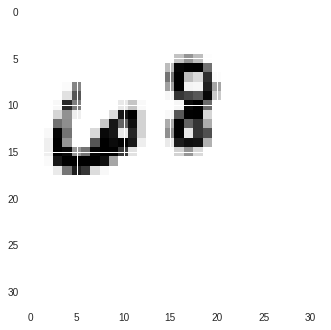

In [125]:
plt.imshow(x_test_split1[0, 0, :, :, 0])

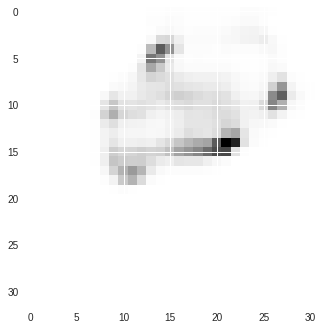

In [122]:
plt.imshow(frames_pred_future[0, 0, :, :])

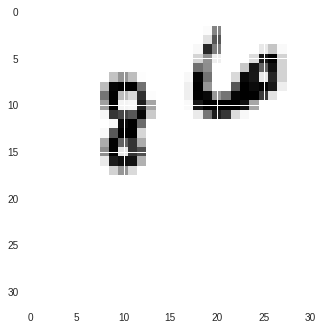

In [126]:
plt.imshow(x_test_split1[0, 9, :, :, 0])

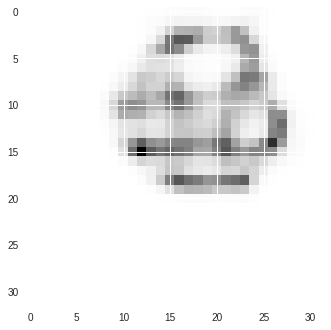

In [123]:
plt.imshow(frames_pred_future[0, 9, :, :])